## Integrate the particles where they feel all NBody forces

In [1]:
import h5py
import tstrippy
from gcs import path_handler as ph
import gcs
import os 
import numpy as np 
import astropy.units as u
import vanilla
import vanilla_loop_over_monte_carlo as vlm
import datetime 

In [2]:
author = "Salvatore Ferrone"
author_affiliation = "Sapienza University of Rome"
author_email = "salvatore.ferrone@uniroma1.it"
description = "Integrating star-particles with in a globular cluster"

In [3]:
GCname              =   "NGC104"
montecarlokey       =   "monte-carlo-002"
internal_dynamics   =   "isotropic-plummer"
GCorbits_potential  =   "pouliasis2017pii"
MWpotential         =   "pouliasis2017pii"
NP                  =   int(1e2)
T                   =   5e9*u.yr
dt                  =   1e4*u.yr

In [4]:
staticgalaxy,integrationparameters,initialkinematics,inithostperturber = vanilla.load_arguments(GCname,montecarlokey,internal_dynamics,GCorbits_potential,MWpotential,NP,T,dt)

In [5]:
integrator=vanilla.initialize_vanilla_integrator(staticgalaxy,integrationparameters,initialkinematics,inithostperturber)

In [6]:
phase_space,tesc=vanilla.leapfrogtofinalpositions(integrator)

In [5]:
attrs = {
    "GCname": GCname,
    "NP": NP,
    "MWpotential": MWpotential,
    "internal_dynamics": internal_dynamics,
    "montecarlokey": montecarlokey,
    "GCorbits_potential": GCorbits_potential,
    "T": T,
    "dt": dt,}


In [6]:
myoutfilename = ph.Stream(GCname,NP,MWpotential,internal_dynamics,montecarlokey)
os.path.exists(myoutfilename)

True

In [7]:
gcs.writers.Stream.stream(myoutfilename,phase_space,tesc,attrs)

In [8]:
myout=h5py.File(myoutfilename,'r')

In [ ]:

# Make a path for the Stream Orbit file if desired
streamOrbitExists=False
if PINTP['writestream']:
    StreamOrbitOutname=GCname+"-"+montecarlokey+"-StreamOrbit.hdf5"
    streamorbitdir=\
        paths['StreamOrbitPath']+\
        PINTP['out-gfieldname']+"/"+\
        GCname+"/"+\
        str(PINTP['NP'])+'/'
    streamOrbitFilename=streamorbitdir+StreamOrbitOutname
    streamOrbitExists=os.path.exists(streamOrbitFilename)


In [ ]:
# if we want to write the intermittent stream, give the path to fortran for the temp binary files
if PINTP['writestream']:
    tempstreamdir=\
        paths['binaryStreamPath']+\
        PINTP['out-gfieldname']+"/"+\
        GCname+"/"+\
        str(PINTP['NP'])+"/"+\
        montecarlokey+"/"
    os.makedirs(tempstreamdir,exist_ok=True)
    integrator.initwritestream(\
        PINTP['writeStreamNSkip'],\
        GCname,\
        tempstreamdir) 

load the host's Mass and size

In [6]:
Mass,rh_m,_a,_,_,_,_,_=gcs.extractors.MonteCarloObservables.extract_all_GC_observables([GCname],montecarlokey)
rplummer=gcs.misc.half_mass_to_plummer(rh_m[0]).value
mass_host = Mass[0].value

load all the perturbers 

In [7]:
GCnames=list(tstrippy.Parsers.baumgardtMWGCs().data['Cluster'][:])
GCnames.remove(GCname)

In [8]:
ts,xs,ys,zs,vxs,vys,vzs=gcs.extractors.GCOrbits.extract_orbits_from_all_GCS(GCnames,GCorbits_potential,montecarlokey)

In [9]:
Masses,rh_mes,RAes,DECes,Rsunes,RVes,mualphaes,mu_deltaes=gcs.extractors.MonteCarloObservables.extract_all_GC_observables(GCnames,montecarlokey)
r_plums = [gcs.misc.half_mass_to_plummer(rh_m).value for rh_m in rh_mes]
Masses = [Mass.value for Mass in Masses]

In [10]:
# load milky way parameters
MWparams = tstrippy.Parsers.potential_parameters.pouliasis2017pii()

In [11]:
integrator = tstrippy.integrator

In [12]:
integrator.setstaticgalaxy(MWpotential,MWparams)
integrator.setintegrationparameters(T.value,dt.value,Nstep)
integrator.setinitialkinematics(x+xH[0],y+yH[0],z+zH[0],vx+vxH[0],vy+vyH[0],vz+vzH[0])

In [13]:
integrator.inithostperturber(tnew,xH,yH,zH,vxH,vyH,vzH,mass_host,rplummer,)
integrator.initperturbers(ts,xs,ys,zs,Masses,r_plums)

In [15]:
integrator.leapfrogtofinalpositions()

In [17]:
xf=integrator.xf
yf=integrator.yf
zf=integrator.zf
vxf=integrator.vxf
vyf=integrator.vyf
vzf=integrator.vzf
tesc=integrator.tesc

In [18]:
import matplotlib.pyplot as plt

array([-5.11356083e+00, -5.11355060e+00, -5.11354037e+00, ...,
       -2.04542433e-05, -1.02271217e-05,  0.00000000e+00])

(500001,)

In [32]:
cond = np.logical_and(-0.5 < tnew , tnew < 0.5)
xx=xH[cond]
yy=yH[cond]
zz=zH[cond]

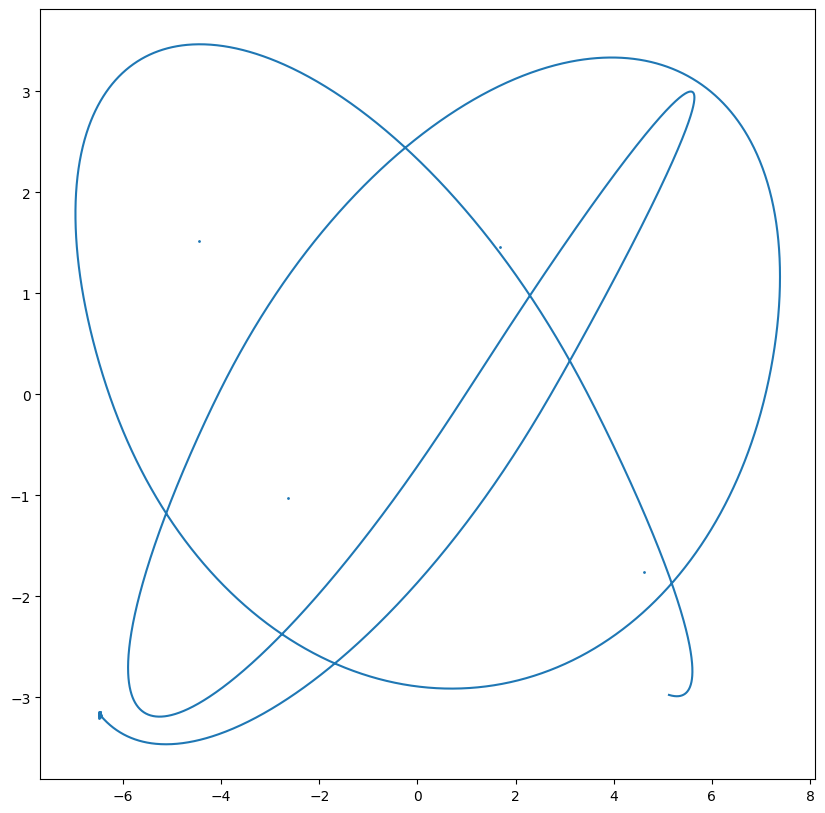

In [34]:
fig,ax=plt.subplots(1,1,figsize=(10,10))
ax.scatter(xf,zf,s=1)
ax.plot(xx,zz)